<h4> Decision Trees </h4>

Train a decisin tree with the from sklearn's iris dataset https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

- Select the columns for X and the target y

- Split the data in train and test splits with sklearn train_test_split function:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Standardize X_train and X_test using Sklearn's standard scaler: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Use Sklearn's Decision Tree:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Display the trained decision tree

- Compute the accuracy the test set with sklearn metrics:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- Show the confusion matrix on the test set:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [2]:
print(iris.keys())
print('')
print('feature names:', iris['feature_names'])
print('target names:', iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

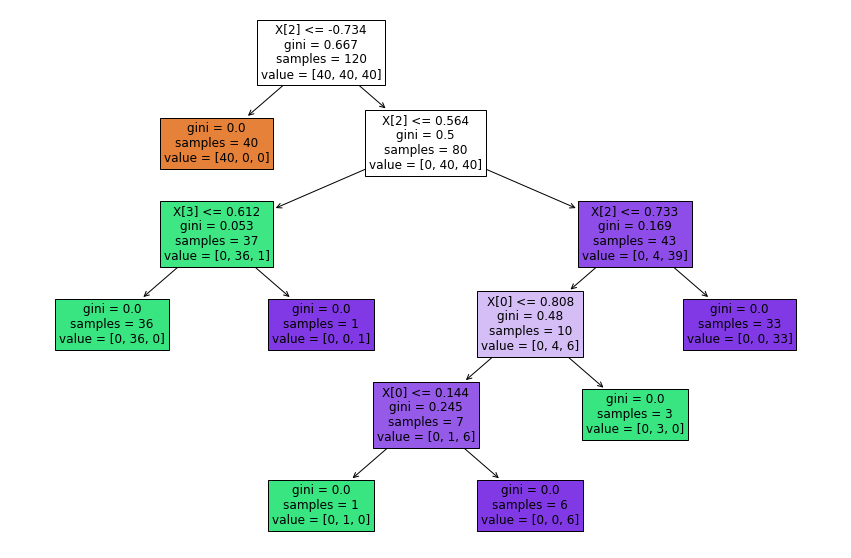

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(decision_tree, fontsize=12, filled=True)
print('')

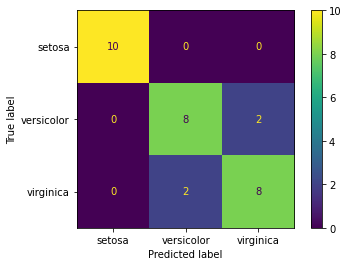

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris['target_names'])
disp.plot()

<h4> Random forests </h4>

- Use the same dataset to train a RandomForestClassifier

- Check the accuracy and F1 score on the test set

- Plot the most important features

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9666666666666667
0.9665831244778613


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importances: [0.09241862 0.02150395 0.42831489 0.45776254]


Text(0, 0.5, 'Relative feature importance')

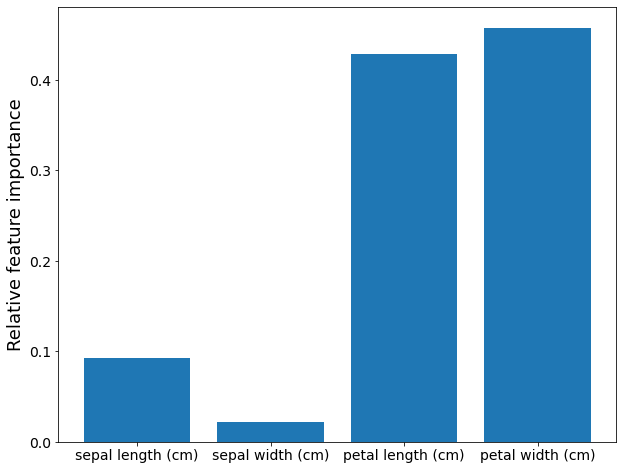

In [8]:
print(iris['feature_names'])
print('feature importances:', random_forest.feature_importances_)
plt.figure(figsize=(10,8))
plt.bar(iris['feature_names'], random_forest.feature_importances_)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Relative feature importance', fontsize=18)

<h4> Principal Component Analysis (PCA) </h4>

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction and data transformation. It aims to identify the directions (principal components) in which the data varies the most and represents the data in a new coordinate system defined by these components.

The key idea behind PCA is to find a lower-dimensional representation of the data that captures the maximum amount of variance. It achieves this by transforming the original features into a new set of uncorrelated variables, called principal components. The first principal component captures the most significant amount of variance in the data, followed by the second principal component, and so on.

Here's a step-by-step overview of how PCA works:

Standardize the data: If the features have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances.

Compute the covariance matrix: The covariance matrix is computed to understand the relationships and dependencies between the different features in the data.

Perform eigendecomposition: The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

Select the principal components: The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. The number of principal components to retain depends on the desired level of dimensionality reduction.

Project the data onto the new coordinate system: The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

PCA is a powerful tool for exploratory data analysis, visualization, and feature extraction. It helps to identify patterns, rbeduce noise, and provide a concise representation of the data. PCA is widely used in various fields, including image processing, signal processing, genetics, finance, and social sciences, where dimensionality reduction and data compression are necessary.

*Generated with ChatGTPv3.5 May 24th Version, prompt: "what is principal component analysis."*

![PCA](PCA.png "Principal Component ANalysis")

### General procedure

1. Standardize the data (features X)
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors of the covariance matrix
4. Select the most significant components (~95%) or the first two in case you want to visualize the projection
5. Transform the data

The transformation **T = X W** maps a data vector $x_{(i)}$ from an original space with p variables to a lower dimensional space. Nonetheless, we don't need to maintain all principal components. Select the two eigenvectors with the largest eigenvalues and do the follwing mapping: $\begin{gather*}
{\displaystyle \mathbf {T}=\mathbf {X} \mathbf {W}}
\end{gather*}
$

Use Sklearn's PCA and project your data into the two first principal components

In [9]:
import numpy as np

# 1 - We standardize the data
data = scaler.fit_transform(X)

# 2 - We build the covariance matrix
# In this case we need features as rows and observations as columns
cov_matrix = np.cov(data.T)

# 3 - We calculate the eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

# 4 - We select the number of principal components that we want to use for the projection
n_components = 2

# 5 - We project the data
projected_data = np.dot(data, eigenvecs[:,:n_components])

Text(0, 0.5, 'PCA component 2')

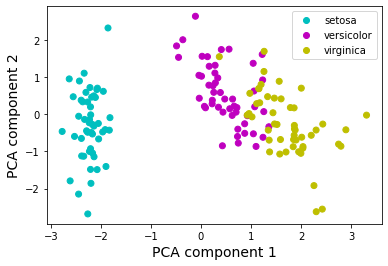

In [10]:
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['c', 'm', 'y'])
scatter = plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=colormap)
plt.legend(handles = scatter.legend_elements()[0], labels=list(iris['target_names']))
plt.xlabel('PCA component 1', fontsize=14)
plt.ylabel('PCA component 2', fontsize=14)

In [11]:
explained_variance_ratio = eigenvals / np.sum(eigenvals)
explained_variance_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
proj_data = pca.fit_transform(data)

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
eigenvecs[:,:n_components]

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [15]:
pca.components_.T

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])